<a href="https://colab.research.google.com/github/Annonamed404/connex/blob/master/Forecasting_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
data = {
    "No": list(range(1, 37)),
    "Bulan": [
        "Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember",
        "Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember",
        "Januari", "Februari", "Maret", "April", "Mei", "Juni", "Juli", "Agustus", "September", "Oktober", "November", "Desember"
    ],
    "Tahun": [
        2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
        2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
        2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023
    ],
    "Penjualan (Unit)": [
        1000, 1100, 1050, 1200, 1150, 1250, 1300, 1400, 1350, 1450, 1500, 1600,
        1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200,
        2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800
    ]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,No,Bulan,Tahun,Penjualan (Unit)
0,1,Januari,2021,1000
1,2,Februari,2021,1100
2,3,Maret,2021,1050
3,4,April,2021,1200
4,5,Mei,2021,1150
5,6,Juni,2021,1250
6,7,Juli,2021,1300
7,8,Agustus,2021,1400
8,9,September,2021,1350
9,10,Oktober,2021,1450


In [ ]:
df_arima = df[["Penjualan (Unit)"]].copy()
df_arima.index = pd.date_range(start="2021-01-01", periods=len(df), freq="ME")

In [ ]:
model = ARIMA(df_arima, order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start="2024-01-01", periods=12, freq="ME")

In [ ]:
forecast_df = pd.DataFrame({
    "Bulan_Tahun": forecast_index,
    "Prediksi_Penjualan (Unit)": forecast
}).set_index("Bulan_Tahun")

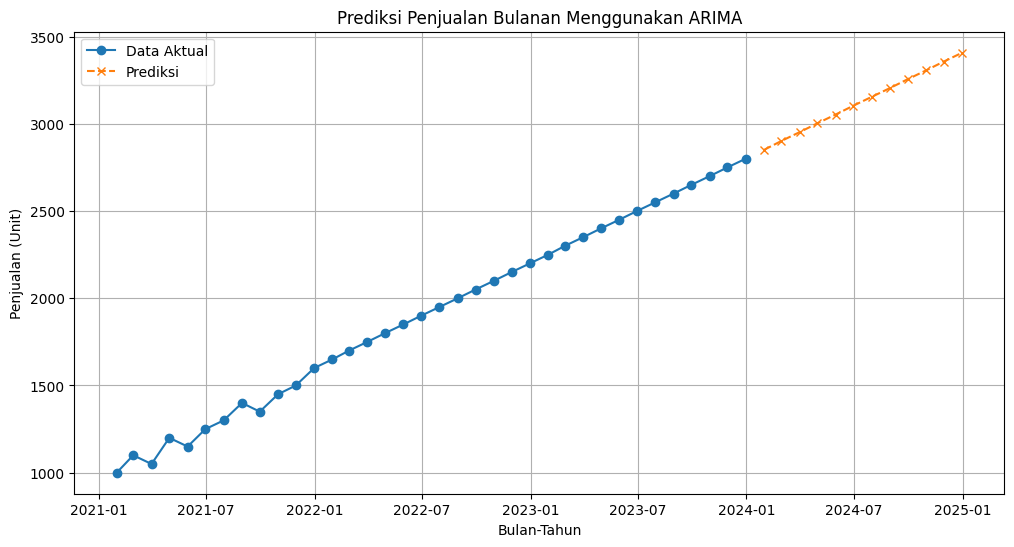

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_arima.index, df_arima["Penjualan (Unit)"], label="Data Aktual", marker='o')
plt.plot(forecast_df.index, forecast_df["Prediksi_Penjualan (Unit)"], label="Prediksi", linestyle='--', marker='x')
plt.title("Prediksi Penjualan Bulanan Menggunakan ARIMA")
plt.xlabel("Bulan-Tahun")
plt.ylabel("Penjualan (Unit)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
print(forecast_df)

             Prediksi_Penjualan (Unit)
Bulan_Tahun                           
2024-01-31                 2850.611878
2024-02-29                 2901.223727
2024-03-31                 2951.835546
2024-04-30                 3002.447335
2024-05-31                 3053.059095
2024-06-30                 3103.670825
2024-07-31                 3154.282526
2024-08-31                 3204.894197
2024-09-30                 3255.505838
2024-10-31                 3306.117450
2024-11-30                 3356.729032
2024-12-31                 3407.340585
